**随机梯度下降(SGD) **是一种简单但又非常高效的方法，主要用于凸损失函数下线性分类器的判别式学习，例如(线性) 支持向量机 和 Logistic 回归 。 尽管 SGD 在机器学习社区已经存在了很长时间, 但是最近在 large-scale learning （大规模学习）方面 SGD 获得了相当大的关注。

SGD 已成功应用于在文本分类和自然语言处理中经常遇到的大规模和稀疏的机器学习问题。对于稀疏数据，本模块的分类器可以轻易的处理超过$10^5$ 的训练样本和超过 $10^5$ 的特征。

Stochastic Gradient Descent （随机梯度下降法）的**优势**:
1)高效。

2)易于实现 (有大量优化代码的机会)。

Stochastic Gradient Descent （随机梯度下降法）的**劣势**:

1)SGD 需要一些超参数，例如 regularization （正则化）参数和 number of iterations （迭代次数）。

2)SGD 对 feature scaling （特征缩放）敏感。

## 分类
警告:

在拟合模型前，确保你重新排列了（打乱）你的训练数据，或者使用 shuffle=True 在每次迭代后打乱训练数据。

SGDClassifier 类实现了一个简单的随机梯度下降学习例程, 支持分类问题不同的损失函数和正则化方法。

In [1]:
from sklearn.linear_model import SGDClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X, y)
clf.predict([[2., 2.]])

array([1])

SGD 通过训练数据来拟合一个线性模型。成员 **coef_ **保存模型参数,成员 **intercept_** 保存 intercept（截距） （又称作 offset（偏移）或 bias（偏差））:

In [2]:
clf.coef_ ,clf.intercept_ 

(array([[9.85221675, 9.85221675]]), array([-9.99002993]))

模型是否使用 intercept（截距）, 即 a biased hyperplane(一个偏置的超平面), 是由参数 **fit_intercept **控制的。

使用 SGDClassifier.decision_function 来获得到此超平面的 signed distance (符号距离)

In [3]:
clf.decision_function([[2., 2.]])  

array([29.41883706])

具体的 **loss function（损失函数）** 可以通过** loss 参数**来设置。 SGDClassifier 支持以下的 loss functions（损失函数）：

1）loss="hinge": (soft-margin) linear Support Vector Machine （（软-间隔）线性支持向量机），

2）loss="modified_huber": smoothed hinge loss （平滑的 hinge 损失），

3）loss="log": logistic regression （logistic 回归），

4）and all regression losses below（以及所有的回归损失）。

前两个 loss functions（损失函数）是懒惰的，只有一个例子违反了 margin constraint（边界约束），它们才更新模型的参数, 这使得训练非常有效率,即使使用了 L2 penalty（惩罚）我们仍然可能得到稀疏的模型结果。

使用 loss="log" 或者 loss="modified_huber" 来启用 predict_proba 方法, 其给出每个样本$x$的概率估计$P(y|x)$的一个向量：

In [4]:
clf = SGDClassifier(loss="log").fit(X, y)
clf.predict_proba([[1., 1.]])    

array([[0.00416343, 0.99583657]])

具体的惩罚方法可以通过** penalty 参数**来设定。 SGD 支持以下 penalties（惩罚）:

1)penalty="l2": L2 norm penalty on coef_.

2)penalty="l1": L1 norm penalty on coef_.

3)penalty="elasticnet": Convex combination of L2 and L1（L2 型和 L1 型的凸组合）; (1 - l1_ratio) * L2 + l1_ratio * L1.

**默认设置为 penalty="l2" **。 L1 penalty （惩罚）导致稀疏解，使得大多数系数为零。 Elastic Net（弹性网）解决了在特征高相关时 L1 penalty（惩罚）的一些不足。参数 l1_ratio 控制了 L1 和 L2 penalty（惩罚）的 convex combination （凸组合）。

SGDClassifier 通过利用 “one versus all” **（OVA）方法**来组合多个二分类器，从而**实现多分类**。对于每一个$K$类, 可以训练一个二分类器来区分自身和其他$K-1$个类。在测试阶段，我们计算每个分类器的 confidence score（置信度分数）（也就是与超平面的距离），并选择置信度最高的分类。下图阐释了基于 iris（鸢尾花）数据集上的 OVA 方法（示例2）。虚线表示三个 OVA 分类器; 不同背景色代表由三个分类器产生的决策面。

示例1：SGD: Maximum margin separating hyperplane,

Automatically created module for IPython interactive environment


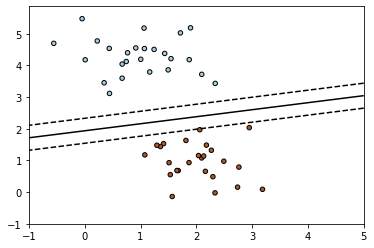

In [5]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)

clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolor='black', s=20)

plt.axis('tight')
plt.show()

示例2：Plot multi-class SGD on the iris dataset

Automatically created module for IPython interactive environment


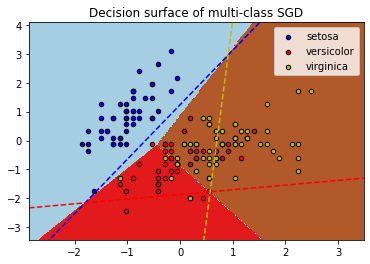

In [6]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
colors = "bry"

# shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02  # step size in the mesh

clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

示例3：SGD: Weighted samples

Automatically created module for IPython interactive environment


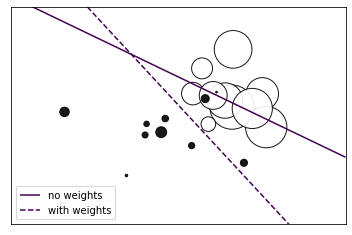

In [7]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight = 100 * np.abs(np.random.randn(20))
# and assign a bigger weight to the last 10 samples
sample_weight[:10] *= 10

# plot the weighted data points
xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=sample_weight, alpha=0.9,
            cmap=plt.cm.bone, edgecolor='black')

# fit the unweighted model
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
no_weights = plt.contour(xx, yy, Z, levels=[0], linestyles=['solid'])

# fit the weighted model
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y, sample_weight=sample_weight)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
samples_weights = plt.contour(xx, yy, Z, levels=[0], linestyles=['dashed'])

plt.legend([no_weights.collections[0], samples_weights.collections[0]],
           ["no weights", "with weights"], loc="lower left")

plt.xticks(())
plt.yticks(())
plt.show()

## 回归
**SGDRegressor 类**实现了一个简单的随机梯度下降学习例程，它**支持用不同的损失函数和惩罚来拟合线性回归模型**。 SGDRegressor 非常适用于有大量训练样本（>10.000)的回归问题，对于其他问题，我们推荐使用 Ridge ，Lasso ，或 ElasticNet 。

具体的损失函数可以通过 loss 参数设置。 SGDRegressor 支持以下的损失函数:

1)loss="squared_loss": Ordinary least squares（普通最小二乘法）,

2)loss="huber": Huber loss for robust regression（Huber回归）,

3)loss="epsilon_insensitive": linear Support Vector Regression（线性支持向量回归）.

Huber 和 epsilon-insensitive 损失函数可用于 robust regression（鲁棒回归）。不敏感区域的宽度必须通过参数 epsilon 来设定。这个参数取决于目标变量的规模。

SGDRegressor 支持** ASGD（平均随机梯度下降）** 作为 SGDClassifier。 均值化可以通过设置 average=True 来启用。

对于利用了 squared loss（平方损失）和 l2 penalty（l2惩罚）的回归，在 Ridge 中提供了另一个采取 averaging strategy（平均策略）的 SGD 变体，其使用了随机平均梯度 (SAG) 算法。

## 稀疏数据的随机梯度下降
注意

由于在截距部分收敛学习速率的差异，稀疏实现与密集实现相比产生的结果略有不同。

在 scipy.sparse 支持的格式中，任意矩阵都有对稀疏数据的内置支持方法。但是，为了获得最高的效率，请使用 scipy.sparse.csr_matrix 中定义的** CSR 矩阵格式**.

示例:Classification of text documents using sparse features

## 停止判据
**SGDClassifier和SGDRegressor 类**提供了两个判据，当达到给定的收敛水平时停止算法:

1)early_stopping = True时,输入数据分为训练集和验证集。该模型在训练集拟合,停止判据是基于验证集上的预测分数。改变参数validation_fraction可以调整验证集的大小。

2)early_stop = False时，模型对整个输入数据进行拟合，停止判据基于整个输入数据上的目标函数来计算。

在这两种情况下，判据在每个epoch计算一次，当判据没有改变的次数超过参数n_iter_no_change的值时，算法将停止。改进是用一个容错参数tol来评估的，并且算法在最大迭代次数max_iter之后停止。

## 实用小贴士
**随机梯度下降法对 feature scaling （特征缩放）很敏感**，因此强烈建议您缩放您的数据。例如，将输入向量 X 上的每个特征缩放到 [0,1] 或 [- 1，+1]， 或将其**标准化**，使其均值为 0，方差为 1。请注意，必须将 **相同** 的缩放应用于对应的测试向量中，以获得有意义的结果。使用 **StandardScaler**能很容易做到这一点：

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train) # Don’t cheat - fit only on training data

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test) # apply same transformation to test data

## 数学描述
给定一组训练样本$(x_1,y_1),\dots,(x_n,y_n)$，其中$x_i\in R^m$，$y_i\in \{-1,1\}$ ， 我们的目标是一个线性 scoring function（评价函数）$f(x)=w^Tx+b$，其中模型参数$w$，截距$b$。为了做预测， 我们只需要看$f(x)$的符号。找到模型参数的一般选择是通过最小化由以下式子给出的正则化训练误差$$E(w,b)=\frac{1}{n}\sum_{i=1}^nL(y_i,f(x_i))+aR(w)$$
其中$L$衡量模型(mis)拟合程度的损失函数，$R$是惩罚模型复杂度的正则化项（也叫作惩罚）; $a$ 是一个非负超平面。

$L$的不同选择产生**不同的分类器**，例如

1)Hinge: (软-间隔) 支持向量机。

2)Log: Logistic 回归。

3)Least-Squares: 岭回归。

4)Epsilon-Insensitive: (软-间隔) 支持向量回归。

所有上述损失函数可以看作是错误分类误差的上限（0 - 1损失），如下图所示。

**比较流行的正则化项**$R$  包括：

1)L2 norm: ,

2)L1 norm: , 这导致了稀疏解。

3)Elastic Net: , l2和l1的凸组合, 其中 由1 - l1_ratio给出.